In [1]:
import json

Load json file into memory

In [2]:
with open('output.json', 'r') as json_file:
    json_data = json.load(json_file)

Defining a item object that can be used for calculations

In [31]:
class item:
    def __init__(self,lethality,crit,ad,stats,name, score, gold_score, price, id):
        self.lethality = lethality
        self.crit = crit
        self.ad = ad
        self.stats = stats
        self.name = name
        self.score = score
        self.gold_score = gold_score
        self.price = price
        self.id = id
# This function will assign a score based on how much ad and lethality an item will give based on Nilah's passive
def create_item_score(crit,ad,lethality, gold):
    total_leth = (crit * 0.33) + lethality + ad
    return total_leth, total_leth/gold

This block will run over all of the values within our json file and get any items that give crit or lethality or ad

In [32]:
# Iterate over the list of item
items = []
for item_name, item_data in json_data.items():
    # Access the stats for each item
    stats = item_data.get('stats')
    ornn = item_data.get('ornn')
    gold = item_data.get('buy')
    id = item_data.get('id')
    # Check if the item has stats and if it contains 'crit' or 'lethality'
    if stats and any(key in stats for key in ['crit', 'lethality', 'armpen'] ) and ornn == None:
        lethality = 0
        crit = 0
        ad= 0
        # Print the stats for the current item
        for stat_name, stat_value in stats.items():
            if(stat_name == "lethality" or stat_name == "armpen"):
                lethality = stat_value
            if(stat_name == "crit"):
                crit = stat_value
            if(stat_name == "ad"):
                ad = stat_value
        try:
            var1,var2 = create_item_score(crit,ad,lethality,gold)
            var2 = round(var2,3) * 100
            new_entry = item(lethality,crit,ad,stats,item_name,var1,var2, gold, id)
            items.append(new_entry)
            print(f"{item_name} Score: {var1} Gold Score: {var2} ")
        except(TypeError):
            print(f"{item_name} missed")

        print()

sorted_items_by_score = sorted(items, key=lambda x: x.score, reverse=True)
sorted_items_by_gold_score = sorted(items, key=lambda x: x.gold_score, reverse=True)

Zeal Score: 4.95 Gold Score: 0.5 

Youmuu's Ghostblade Score: 78.0 Gold Score: 2.5 

Runaan's Hurricane Score: 6.6000000000000005 Gold Score: 0.2 

Lord Dominik's Regards Score: 71.6 Gold Score: 2.4 

Serylda's Grudge Score: 75.0 Gold Score: 2.3 

Umbral Glaive Score: 60.0 Gold Score: 2.6 

The Collector Score: 79.6 Gold Score: 2.7 

Stormrazor Score: 56.6 Gold Score: 1.9 

Essence Reaver Score: 61.6 Gold Score: 2.1 

Eclipse Score: 72.0 Gold Score: 2.3 

Serpent's Fang Score: 67.0 Gold Score: 2.6 

Bloodthirster Score: 61.6 Gold Score: 1.9 

Navori Quickblades Score: 71.6 Gold Score: 2.1 

Axiom Arc Score: 73.0 Gold Score: 2.4 

Rapid Firecannon Score: 36.6 Gold Score: 1.2 

Prowler's Claw Score: 70.0 Gold Score: 2.3 

Phantom Dancer Score: 26.6 Gold Score: 0.8999999999999999 

Cloak of Agility Score: 4.95 Gold Score: 0.8 

Ohmwrecker (Turret Item) missed

Last Whisper Score: 38.0 Gold Score: 2.6 

Mortal Reminder Score: 76.6 Gold Score: 2.6 

Immortal Shieldbow Score: 56.6 Gold Score

Some print functions that can be used to display item values

In [33]:
import io
from PIL import Image
from matplotlib import pyplot as plt
import requests
def print_stats(stats):
    print(f"stats: ")
    for stat_name, stat_value in stats.items():
        print(f"{stat_name}: {stat_value}")

def print_item(item):
    print(item.name + '')
    print(f"cost: {item.price}")
    print(f"item score: {item.score}")
    print(f"item gold score: {item.gold_score}")
    print_stats(item.stats)
    print("\n")

def get_image(item):
    image_url = f"http://ddragon.leagueoflegends.com/cdn/13.11.1/img/item/{item.id}.png"
    response = requests.get(image_url)
    # Check if the GET request was successful
    if response.status_code == 200:
        # Retrieve the image data
        img_data = response.content
        # Create a file-like object from the image data
        img_file = io.BytesIO(img_data)
        # Load the image using PIL
        img = Image.open(img_file)
        # Convert image to RGBA format
        img = img.convert("RGBA")
        # Create a transparent background
        transparent_bg = Image.new("RGBA", img.size, (0, 0, 0, 0))
        # Composite the image on the transparent background
        img_with_transparent_bg = Image.alpha_composite(transparent_bg, img)
        # Convert image back to RGB mode for display
        img_with_transparent_bg = img_with_transparent_bg.convert("RGB")
        # Display the image
        plt.figure(figsize=(1, 1))
        plt.imshow(img_with_transparent_bg)
        plt.axis('off')
        plt.show()
    else:
        print(f"No image available for item: {item_name}")

Print all items sorted by scores

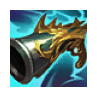

The Collector
cost: 3000
item score: 79.6
item gold score: 2.7
stats: 
ad: 55
lethality: 18
crit: 20




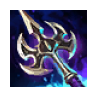

Umbral Glaive
cost: 2300
item score: 60.0
item gold score: 2.6
stats: 
ad: 50
ah: 15
lethality: 10




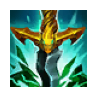

Serpent's Fang
cost: 2600
item score: 67.0
item gold score: 2.6
stats: 
ad: 55
lethality: 12




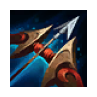

Last Whisper
cost: 1450
item score: 38.0
item gold score: 2.6
stats: 
ad: 20
armpen: 18




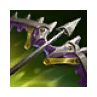

Mortal Reminder
cost: 3000
item score: 76.6
item gold score: 2.6
stats: 
ad: 40
armpen: 30
crit: 20




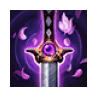

Youmuu's Ghostblade
cost: 3100
item score: 78.0
item gold score: 2.5
stats: 
ad: 60
ah: 15
lethality: 18




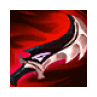

Duskblade of Draktharr
cost: 3100
item score: 78.0
item gold score: 2.5
stats: 
ad: 60
ah: 20
lethality: 18




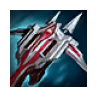

Lord Dominik's Regards
cost: 3000
item score: 71.6
item gold score: 2.4
stats: 
ad: 35
armpen: 30
crit: 20




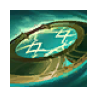

Axiom Arc
cost: 3000
item score: 73.0
item gold score: 2.4
stats: 
ad: 55
ah: 25
lethality: 18




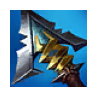

Serylda's Grudge
cost: 3200
item score: 75.0
item gold score: 2.3
stats: 
ad: 45
ah: 20
armpen: 30




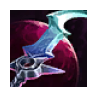

Eclipse
cost: 3100
item score: 72.0
item gold score: 2.3
stats: 
ad: 60
ah: 15
lethality: 12




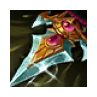

Prowler's Claw
cost: 3000
item score: 70.0
item gold score: 2.3
stats: 
ad: 55
ah: 15
lethality: 15




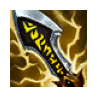

Infinity Edge
cost: 3400
item score: 76.6
item gold score: 2.3
stats: 
ad: 70
spec: +35% [[critical strike damage]]
crit: 20




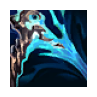

Essence Reaver
cost: 2900
item score: 61.6
item gold score: 2.1
stats: 
ad: 55
ah: 20
crit: 20




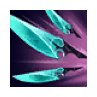

Navori Quickblades
cost: 3400
item score: 71.6
item gold score: 2.1
stats: 
ad: 65
ah: 15
crit: 20




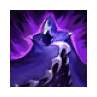

Edge of Night
cost: 2900
item score: 60.0
item gold score: 2.1
stats: 
ad: 50
lethality: 10
hp: 325




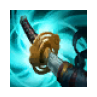

Stormrazor
cost: 3000
item score: 56.6
item gold score: 1.9
stats: 
ad: 50
crit: 20
as: 15




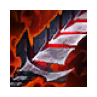

Bloodthirster
cost: 3200
item score: 61.6
item gold score: 1.9
stats: 
ad: 55
lifesteal: 18
crit: 20




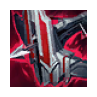

Immortal Shieldbow
cost: 3000
item score: 56.6
item gold score: 1.9
stats: 
ad: 50
lifesteal: 7
crit: 20




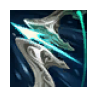

Galeforce
cost: 3400
item score: 61.6
item gold score: 1.7999999999999998
stats: 
ad: 55
ms: 7
crit: 20
as: 15




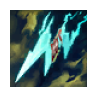

Statikk Shiv
cost: 3000
item score: 51.6
item gold score: 1.7000000000000002
stats: 
ad: 45
crit: 20
as: 25




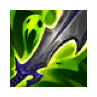

Mercurial Scimitar
cost: 3000
item score: 46.6
item gold score: 1.6
stats: 
ad: 40
mr: 50
crit: 20




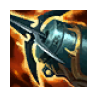

Kraken Slayer
cost: 3000
item score: 46.6
item gold score: 1.6
stats: 
ad: 40
crit: 20
as: 30




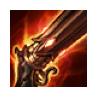

Rapid Firecannon
cost: 3000
item score: 36.6
item gold score: 1.2
stats: 
ad: 30
ms: 7
crit: 20
as: 15




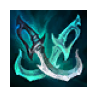

Phantom Dancer
cost: 2800
item score: 26.6
item gold score: 0.8999999999999999
stats: 
ad: 20
ms: 7
crit: 20
as: 30




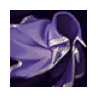

Cloak of Agility
cost: 600
item score: 4.95
item gold score: 0.8
stats: 
crit: 15




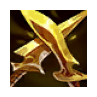

Zeal
cost: 1100
item score: 4.95
item gold score: 0.5
stats: 
as: 15
crit: 15
ms: 5




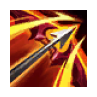

Runaan's Hurricane
cost: 2800
item score: 6.6000000000000005
item gold score: 0.2
stats: 
as: 40
crit: 20
ms: 7




In [34]:
for item in sorted_items_by_gold_score:
    #print(f"{item.name}, score: {item.score}, gold score {item.gold_score}, price {item.price}")
    get_image(item)
    print_item(item)
